In [ ]:
# list, dict, dataframe
#https://stackoverflow.com/questions/9427163/remove-duplicate-dict-in-list-in-python
#https://stackoverflow.com/questions/674519/how-can-i-convert-a-python-dictionary-to-a-list-of-tuples
#https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

In [13]:
store_num = []
dict_num = {}
for key, i in enumerate(range(3)):
    print(key)
    dict_num[key] = i
    store_num.append((key, i))
dict_num

0
1
2


{0: 0, 1: 1, 2: 2}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
import pandas as pd
pd.DataFrame(dict_num)

ValueError: If using all scalar values, you must pass an index

In [16]:
#https://stackoverflow.com/questions/18180763/set-difference-for-pandas/27579192

df1 = pd.DataFrame({'col1':[1,2,3], 'col2':[2,3,4]})
df2 = pd.DataFrame({'col1':[4,2,1], 'col2':[6,3,2]})

In [17]:
df1

,col1,col2
0,1,2
1,2,3
2,3,4


In [18]:
df2

,col1,col2
0,4,6
1,2,3
2,1,2


In [24]:
[df1.isin(df2).all(1)]

[0    False
 1     True
 2    False
 dtype: bool]

In [20]:

n_fold= 5; print("-"* 20 + str(n_fold) + "_n_fold"  + "-"* 20)

--------------------5_n_fold--------------------


In [91]:
#https://stackoverflow.com/questions/43459786/plot-timeseries-scatterplot
import pandas as pd
import matplotlib.pyplot as plt

# replicate Data from question in DataFrame
v = [[12,34,51], [9,76,12], [12,23,7], [54,4,34]]
df = pd.DataFrame(v, columns=["01/01/2016","01/07/2016","01/14/2017"], 
                      index=["ABC", "XYZ", "PQR", "DEF"])
print(df)


#use column headers as x values
x = pd.to_datetime(df.columns, format='%m/%d/%Y')
x
# # sum all values from DataFrame along vertical axis
y = df.values.sum(axis=0)    
y
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()


# scatterplot(x,y, "x_label", "y_label", "title")

# plt.show()

     01/01/2016  01/07/2016  01/14/2017
ABC          12          34          51
XYZ           9          76          12
PQR          12          23           7
DEF          54           4          34


In [2]:
x

DatetimeIndex(['2016-01-01', '2016-01-07', '2017-01-14'], dtype='datetime64[ns]', freq=None)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [105]:
dt = 5
Nt = 49
stocks = np.zeros((Nt, 4))
stocks[0, ] = [100, 112, 121, 115]

# # calculate and store time series
for ii in range(1, Nt):
    stocks[ii, ] = stocks[ii-1, ] + np.sqrt(dt) * np.random.randn(4)
stocks

# %% t

rng_2 = pd.date_range('2018-01-01', periods= 49, freq="1d", name = 'date')
df_t = pd.DataFrame(stocks, index=rng_2,columns = list('abcd'))
df_t['weekday_name'] = df_t.index.weekday_name

In [40]:
 #new_df.values()

In [63]:
#new_df.index.get_le


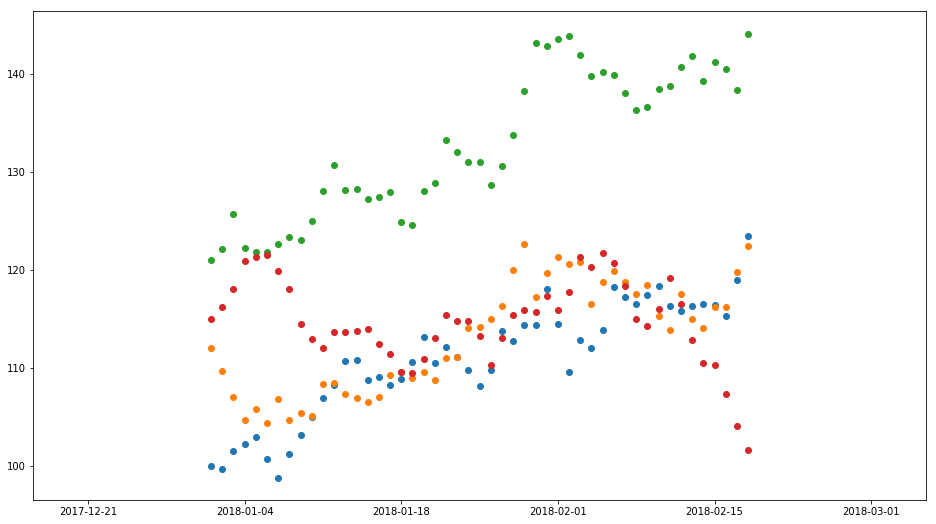

In [107]:
df_t.drop('weekday_name', axis = 1, inplace = True)

import matplotlib.pyplot as plt


df_t.columns.name = 'abc'
grouped = df_t.stack().groupby('abc')
ax = plt.subplots()
for g_index, new_df in grouped:
    #print(g_index)
    plt.scatter(new_df.index.get_level_values(0), new_df)
    #scatterplot(new_df.index.get_level_values(0)  ,new_df ,'x','y' ,'z')
    #plt.show()
    

In [ ]:
scatterplot(df_t.index, df_t.a ,'x','y' ,'z')

In [ ]:
df_t.index

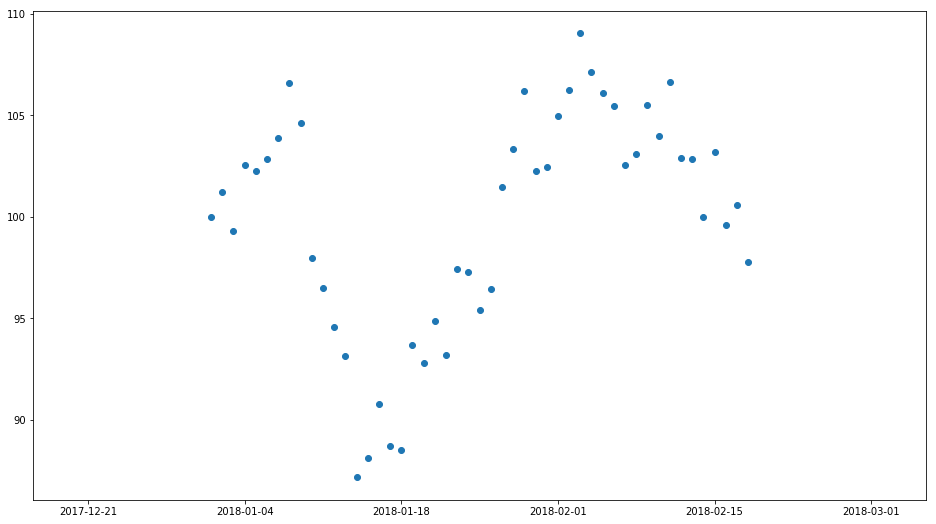

In [18]:
##fig, ax = plt.subplots()
#df_t.plot.scatter(y = 'a', x =  index)
#df_t.plot(kind='scatter', x = df_t.index, y = df_t.a)
plt.rcParams["figure.figsize"] = [16,9] #set
plt.scatter( df_t.index, df_t.a)
#plt.plot(kind ='scatter'df_g['TARGET'], df_g['mdt_yyyymm_date'])

In [ ]:
df_t
plot_time_list_append(df_t)

In [106]:
def plot_time_list_append(df):
  # Rainbow-ranked by median visitor over all restaurants.
  COLORS = {
      'Saturday': 'red',
      'Sunday': 'orange',
      'Friday': 'green',
      'Thursday': 'blue',
      'Wednesday': 'purple',
      'Tuesday': 'brown',
      'Monday': 'black',
  }
  traces = []
  for day_of_week in COLORS:
    # Plots the number of visitors to this restaurant over time.
    x = df.loc[df['weekday_name'] == day_of_week].index
    print(x.shape)
    print(day_of_week)
    y = df.loc[df['weekday_name'] == day_of_week]['a']
    # Adds points to the plot.
    traces.append(go.Scatter(x=x,y=y,mode='markers',name=day_of_week,line=dict(color=COLORS[day_of_week]),))
    # Adds a rolling mean line.
    traces.append(go.Scatter(x=x,y=y.rolling(2, min_periods=1, center=True).mean(),mode='lines',name=day_of_week,line=dict(color=COLORS[day_of_week]),))
    layout = go.Layout(title='Visitors to resaurant by day of week, with rolling averages',  yaxis=dict(title='Visitors'))
  #iplot(go.Figure(data=traces, layout=layout))
  plotly.offline.iplot((go.Figure(data=traces, layout=layout)))
plot_time_list_append(df_t)

(7,)
Saturday
(7,)
Sunday
(7,)
Friday
(7,)
Thursday
(7,)
Wednesday
(7,)
Tuesday
(7,)
Monday


In [ ]:
import sys
sys.path.insert(0, '/home/bono/Dropbox/notebook/01_MINI_PY/live_util/')
import live_df
import pandas as pd

sys.path.insert(0, '/home/bono/Dropbox/notebook/01_MINI_PY/')
import utils
import pandas as pd

print(" 01_df_iterrows")
df_kodak = utils.df_kodak
#1
for iNum, (idx, rows) in enumerate(df_kodak.iterrows()):
    if rows['5Y'] > 3:
        rows['rating'] = 'DD'
        print(rows)
        df_kodak.loc[idx,'rating'] ='DD'
print(df_kodak)


print("02_update_list")
dictList = (df_kodak.to_dict(orient='records'))
print(dictList)
for di in dictList:
    di['rating'] = 'DD5'
    print(type(di))
    print(di)

print("update_dictList")
print(dictList)
df_kodi = pd.DataFrame(dictList)
print(df_kodi)

print("03---double loop ----")
for i in range(df_kodak.shape[0]):
    print(i)
    for j in range(df_kodak.shape[1]):
        print(df_kodak.iloc[i,j])

# itertuples과 iteritems은 딱히 뭔가 보이지는 않음
for rows in df_kodak.itertuples():
    print(type(rows))
    print(rows)
for v_rows in df_kodak.iteritems():
    print(type(v_rows))
    print(v_rows)

print("04---insert by group by")
grouped = df_kodak.groupby(['rating','firm'])
print(grouped)

for  group in df_kodak.groupby(['rating','firm']).groups:
    print(group)
    tag1, tag2 = group
    tags = dict(tag1=tag1, tag2=tag2)
    print(tags)
    sub_df = grouped.get_group(group)
    print(sub_df)


In [ ]:
from pandas import DataFrame
df1 = DataFrame({'col1':[1,2],'col2':[3,4]})
df2 = DataFrame({'col3':[5,6]})     

In [ ]:
from pandas import DataFrame, merge
df1 = DataFrame({'key':[1,1], 'col1':[1,2],'col2':[3,4]})
df2 = DataFrame({'key':[1,1], 'col3':[5,6]})


In [ ]:
df1

In [ ]:
merge(df1, df2,on='key')[['col1', 'col2', 'col3']]

In [ ]:
import lightgbm as lgb

In [ ]:
lgb

In [ ]:
params = {'boosting_type': 'gbdt',
          'metric' : 'rmse', "objective" : "regression"}
model = lgb.LGBMRegressor(params)

(model.get_params())

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta, date, datetime 

data
data1 = np.random.randint(1,200, 100) 

data2 =  np.round(np.random.rand(100, 2) * 10)

type(data2)

#np.vstack([data, data2.T])

rng_1 = pd.date_range('2018-01-01', periods = 100, freq ="1d", name = 'date')
data = np.concatenate((data2,data1[:,None]),axis=1)

df_a = pd.DataFrame(data = data, index = rng_1, columns = ['item_nbr','store_nbr','unit_sales'])

big_df =(df_a.set_index(['item_nbr','store_nbr'],append = True).unstack()).interpolate().fillna(method  = 'bfill').unstack().interpolate().fillna(0).copy()

big_df_dcast = big_df.stack().stack().copy()

df_a.head()

#big_df['dow'] = big_df.reset_index()['index'].dt.dayofweek\

df_a.reset_index(inplace = True)
df_a['dow']  = df_a['date'].dt.dayofweek

ma_dw = df_a[['item_nbr','store_nbr','dow','unit_sales']].groupby(
        ['item_nbr','store_nbr','dow'])['unit_sales'].mean().to_frame('madw').reset_index()

ma_dw.head()

ma_wk  = ma_dw[['item_nbr','store_nbr','dow','madw']].groupby(
        ['item_nbr','store_nbr'])['madw'].mean().to_frame('mawk').reset_index()

u_dates = df_a.date.unique()
u_stores = df_a.store_nbr.unique()
u_items = df_a.item_nbr.unique()

df_a.set_index(['date', 'store_nbr', 'item_nbr'], inplace=True)

big_df_dcast= big_df_dcast.reindex(
    pd.MultiIndex.from_product(
        (u_dates, u_stores, u_items),
        names=['date','store_nbr','item_nbr']
    )
).reset_index()

big_df_dcast.fillna(0, inplace = True)

ma_is = big_df_dcast[['item_nbr','store_nbr','unit_sales']].groupby(
        ['item_nbr','store_nbr'])['unit_sales'].mean().to_frame('mais')

last_date = big_df_dcast.iloc[big_df_dcast.shape[0]-1].date

# ma_is
# for i in [56,28,14,7,3,1]:
#     tmp = big_df_dcast[big_df_dcast.date>last_date-timedelta(int(i))]
#     tmpg = tmp.groupby(['item_nbr','store_nbr'])['unit_sales'].mean().to_frame('mais'+str(i))
#     ma_is = ma_is.join(tmpg, how='left')

In [ ]:
words = ('u', 's')
list_jsrfc = ['join', 'split', 'replace','find','count']
[x for x in list_jsrfc if any(w in x for w in words)]

import numpy as np
import pandas as pd
#----
data =  np.round(np.random.rand(100, 2) * 10)
rand3 = np.random.randint(1,100, size=(25));data[rand3, 0]  = np.NaN
rand3 = np.random.randint(1,100, size=(25));data[rand3, 1]  = np.NaN

df_any = pd.DataFrame(data)

df_any.isnull().any(axis = 1)
percent = (100 * df_any.isnull().sum() / df_any.shape[0]).sort_values(ascending=False)
print(percent)
df_any.apply(lambda x:sum(x.isnull()))

df_any.head()[df_any.isnull().any(1).head()]

In [ ]:
df_any.head()

In [ ]:
df_any.head()[df_any.isnull().any(1).head()]

In [ ]:
test_a[test_a.isnull().any(1)]




print(train[train.isnull().any(axis=1)][null_columns].head())

In [ ]:
import numpy as np
import pandas as pd

data =  np.round(np.random.rand(100, 2) * 10)
rand3 = np.random.randint(1,100, size=(25));data[rand3, 0]  = np.NaN
rand3 = np.random.randint(1,100, size=(25));data[rand3, 1]  = np.NaN

In [ ]:
df1 = pd.DataFrame(data)

In [ ]:
df1.dropna(how = 'all')

In [ ]:
df1[df1.isnull().any(1)]

In [ ]:
import pandas as pd
df=pd.DataFrame({"A":[1,1,2],"B":["a","b","c"],"metric":[4,5,2]})
#df.groupby(["A","B"]).sum().groupby(level='A').transform('sum')

In [ ]:
df_l4 = pd.DataFrame( {'A' : [1, 1, 1, 1, 2, 2, 2, 3, 3, 4 ]})
df_l4['B'] = (df_l4.A.astype('str') + df_l4.reset_index().groupby('A')['index'].rank(ascending=True, method='max').astype('str')).astype('float')
imsi = df_l4.reset_index().groupby('A')['index'].rank(ascending=True, method='max').map('{:.0f}'.format)
df_l4['C'] = imsi + imsi

In [ ]:
df_l4

In [ ]:

def df_with_rate(df, cols):
    #df_l4.groupby(["A","C"]).sum().groupby(level='A').transform('sum')
    #grp['Total']=grp.sum(level='A').reindex(grp.index,level=0)
    #grp.join(grp.groupby('A').apply(lambda r: r/r.sum()))

    grp = df.groupby(["A","C"]).sum()
    grp = df.groupby(cols).sum()
    #grp.join(grp.groupby('A').apply(lambda r: r/r.sum()), rsuffix='_x2')
    #https://stackoverflow.com/questions/48345059/pandas-groupby-rollup
    return grp.join(grp.groupby(cols[0]).apply(lambda r: r/r.sum()), rsuffix='_x2')


df_with_rate(df_l4, ['A','C'])

In [ ]:
grp

In [ ]:
#df_a
import numpy as np
import pandas as pd
data  = np.arange(12).reshape((3, 4))
index = [2003, 2004, 2005 ]
columns = ['Arizona','Boston', 'Chicago','Detroit']
df_a = pd.DataFrame(data = data, index = index , columns = columns)


In [ ]:
df_a.groupby(['Arizona']).sum()

In [ ]:
s  = df_a['Arizona']
#.index.map('_'.join)

In [ ]:
df_a.index.map('_'.join)


In [ ]:
s.index = s.index.map('_'.join)


In [ ]:
# 1. np.where 

import numpy as np
import pandas as pd

data =  np.round(np.random.rand(100, 2) * 10)
rand3 = np.random.randint(1,100, size=(25));data[rand3, 0]  = np.NaN
rand3 = np.random.randint(1,100, size=(25));data[rand3, 1]  = np.NaN

data[rand3, 0]

np.where(data > 5, 1,-1 )[:6]
np.where(np.isnan(data))
#df_a[np.where(df_a['Arizona'] == 0,True, False)]

In [ ]:
# 2. where _pd 

columns = ['a','b']
df_d = pd.DataFrame(data = data, columns = ['a','b'])

df_d.head()

df_d.where(df_d>2,  np.nan).head()

# 3. pd_ query

df_d.query('(a ==a)').head()

##https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

In [ ]:
#data[:10,1]
(np.isnan(data[1]))
#np.where(data > 5, 2,0 )

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#df_a
data  = np.arange(12).reshape((3, 4))
index = [2003, 2004, 2005 ]
columns = ['Arizona','Boston', 'Chicago','Detroit']
df_a = pd.DataFrame(data = data, index = index , columns = columns)
print(df_a)|e

In [ ]:
#df_a.loc[2003].apply(lambda r:r.sum())

df_a.apply(lambda r:r/r.sum(), axis =1)

In [ ]:
def add_onetwo(X):
    #print(X)
    
    return [X['Arizona'],X['Boston']]
    #return [X[2004],X[2005], X[2003]]

df_a['aa'], df_a['bb'] = zip(*df_a[['Arizona','Boston']].apply(lambda x: add_onetwo(x) , axis = 1))

xx = zip(*df_a[['Arizona','Boston']].apply(lambda x: add_onetwo(x) , axis = 1))

In [ ]:
list(xx)

In [ ]:
type(a)

In [ ]:
b

In [ ]:
df_a['Arizona'].apply(lambda x:add_two())

In [ ]:
df_a['Arizona'].apply(lambda x:add_two)

In [ ]:
df = pd.DataFrame({'X': np.arange(10), 'Y': np.arange(10) + np.random.randn(10)})

mod = sm.OLS.from_formula("Y ~ X", df)

In [ ]:
res = mod.fit()

exog = pd.DataFrame({"X": np.linspace(0, 10, 100)})

In [ ]:
res.predict(exog)

In [ ]:
res.predict(exog)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df =pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [ ]:
df.shape

In [ ]:
X = df
y = boston_data.target
X_constant = sm.add_constant(X)

In [ ]:
# 1. numpy.where

In [ ]:
data  = np.arange(12).reshape((3, 4))
index = [2003, 2004, 2005 ]
columns = ['Arizona','Boston', 'Chicago','Detroit']
df_a = pd.DataFrame(data = data, index = index , columns = columns)
print(df_a)

In [ ]:
df_a['Arizona'] == 0

In [ ]:
df_a[[ True, False, False]]

In [ ]:
np.where(df_a['Arizona'] == 0,True, False)

In [ ]:
df[np.where(df.C | df.D, True, False)]


In [ ]:
import numpy as np

In [ ]:
a

In [ ]:
ax = ()

In [ ]:
abb = {}

In [ ]:
for i in np.arange(4, 100, 4):
    for j in np.arange(4, 100, 4):
        a  =(i, j)
        abb[a] = 10
    

In [ ]:
type(abb)

In [ ]:
pd.DataFrame([abb]).T